In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df1 = pd.DataFrame.from_csv("CME FUTURE JAN 18.csv")
df2 = pd.DataFrame.from_csv("BTC INTRADAY.csv")


In [14]:
df1 = df1.rename( columns={'Open':'FUT Open', 'High':'FUT High','Low':'FUT Low', 'Close':'FUT Close'})

In [74]:
df2.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-01-01 23:40:00,13446.51,13490.61,13380,13431,38.09,510576.46,13404.9
2018-01-01 23:45:00,13431.03,13468.72,13381.13,13419.38,11.27,151171.61,13413.61
2018-01-01 23:50:00,13419.38,13445,13380.93,13445,40.3,540876.56,13420.02
2018-01-01 23:55:00,13444.99,13451.86,13372.33,13443.41,39.95,535412.5,13402.3
2018-01-02 00:00:00,13394.2,13544.53,13394.2,13517.37,35.54,479137.21,13480.15


In [16]:
df3 = df1.join(df2)

In [21]:
df3 = df3.dropna()

In [24]:
df3.tail()

,FUT Open,FUT High,FUT Low,FUT Close,SMAVG (5) on Close,SMAVG (10) on Close,SMAVG (15) on Close,Volume,SMAVG (5),Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,,,,,,,,,,
2018-01-01 18:20:00,13560,13560,13560,13560,13657,14057,14210,1,2,13098.91,13327.45,13098.91,13327.45,31.58,419446.07,13282.86
2018-01-01 18:15:00,13580,13580,13580,13580,13839,14153,14277,2,2,13114.68,13197.85,13098.2,13098.27,2.4,31531.5,13148.47
2018-01-01 18:10:00,13690,13690,13570,13570,13995,14243,14344,7,2,13150.4,13155.46,13094.34,13155.46,1.56,20491.05,13116.5
2018-01-01 18:05:00,13620,13620,13620,13620,14161,14338,14416,1,3,13138.27,13179.17,13125.05,13150.41,4.59,60444.92,13164.18
2018-01-01 18:00:00,13955,13955,13955,13955,14335,14424,14484,1,3,13063.5,13170.24,13040.46,13150.03,11.58,151367.39,13076.27


In [33]:
x = df3.index
y1 = df3['Close']
y2 = df3['FUT Close']

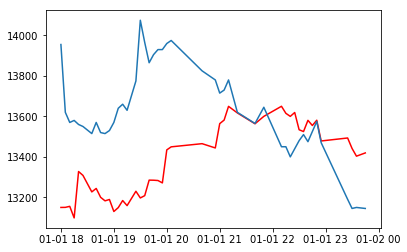

In [51]:
#BTC is red future is blue
plt.plot(y1, label='BTC', c='r')

plt.plot(y2)


In [53]:
df4 = pd.DataFrame.from_csv('Risk Free Rate.csv')
df4.head()

,Last Price
Date,
2018-01-02 13:30:00,1.3825
2018-01-02 13:25:00,1.3825
2018-01-02 13:20:00,1.3825
2018-01-02 13:15:00,1.3825
2018-01-02 13:10:00,1.3825


In [58]:
df4 = df4.rename(columns={'Last Price':'Risk Free Rate'})

In [77]:
df4['2018-01-01']

,Risk Free Rate
Date,
2018-01-01 16:20:00,1.3525
2018-01-01 15:15:00,1.3525
2018-01-01 14:10:00,1.3525
2018-01-01 13:05:00,1.3525
2018-01-01 12:00:00,1.3525
2018-01-01 10:55:00,1.3525
2018-01-01 09:50:00,1.3525
2018-01-01 08:45:00,1.3525
2018-01-01 07:40:00,1.3525


In [72]:
df3 = df3.drop(['Risk Free Rate'],axis=1)

In [91]:
df3['Risk Free Rate'] = .013525/3

In [92]:
df3['Implied Risk Free Rate'] = (1+df3['Risk Free Rate'])*(df3['Close'].astype(float) / df3['FUT Close']) - 1

In [110]:
df3['Hull Implied Risk Free Rate'] = ((np.log(df3['FUT Close']/df3['Close'].astype(float)))-df3['Risk Free Rate']*(17.0/30.0))/(-17.0/30.0)

In [111]:
df3['Hull Implied Risk Free Rate']

Date
2018-01-01 23:45:00    0.040964
2018-01-01 23:35:00    0.038185
2018-01-01 23:30:00    0.043878
2018-01-01 23:25:00    0.044616
2018-01-01 22:55:00    0.005622
2018-01-01 22:50:00    0.005284
2018-01-01 22:45:00    0.008414
2018-01-01 22:40:00    0.018266
2018-01-01 22:35:00    0.006467
2018-01-01 22:30:00    0.011549
2018-01-01 22:25:00    0.027876
2018-01-01 22:20:00    0.030651
2018-01-01 22:15:00    0.026025
2018-01-01 22:10:00    0.030544
2018-01-01 21:50:00   -0.001312
2018-01-01 21:40:00    0.004305
2018-01-01 21:20:00    0.004122
2018-01-01 21:10:00   -0.012285
2018-01-01 21:05:00   -0.014652
2018-01-01 21:00:00   -0.015016
2018-01-01 20:55:00   -0.039054
2018-01-01 20:40:00   -0.042037
2018-01-01 20:05:00   -0.063133
2018-01-01 20:00:00   -0.063214
2018-01-01 19:55:00   -0.080981
2018-01-01 19:50:00   -0.079410
2018-01-01 19:45:00   -0.076039
2018-01-01 19:40:00   -0.070901
2018-01-01 19:35:00   -0.093792
2018-01-01 19:30:00   -0.109168
2018-01-01 19:25:00   -0.066731
201

In [112]:
df3

,FUT Open,FUT High,FUT Low,FUT Close,SMAVG (5) on Close,SMAVG (10) on Close,SMAVG (15) on Close,Volume,SMAVG (5),Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Risk Free Rate,Implied Risk Free Rate,Hull Implied Risk Free Rate
Date,,,,,,,,,,,,,,,,,,,
2018-01-01 23:45:00,13145,13145,13145,13145,13220,13367,13403,1,6,13431.03,13468.72,13381.13,13419.38,11.27,151171.61,13413.61,0.004508,0.025476,0.040964
2018-01-01 23:35:00,13155,13155,13150,13150,13306,13396,13431,4,6,13424.29,13484.6,13398.2,13403.36,15.34,205954.16,13423.93,0.004508,0.023862,0.038185
2018-01-01 23:30:00,13080,13145,13080,13145,13381,13421,13463,5,6,13500,13520.11,13416.55,13441.55,28.21,380223.05,13480.12,0.004508,0.027170,0.043878
2018-01-01 23:25:00,13515,13515,13190,13190,13447,13452,13505,19,5,13441.45,13493.21,13415.15,13493.21,15.44,207672.25,13453.52,0.004508,0.027600,0.044616
2018-01-01 22:55:00,13470,13470,13470,13470,13511,13478,13541,1,2,13548.54,13592.12,13478.5,13478.5,26.62,360245.35,13533.2,0.004508,0.005142,0.005622
2018-01-01 22:50:00,13515,13575,13515,13575,13513,13495,13557,2,2,13545.49,13612.99,13531.99,13580.97,19.61,266387.58,13582.69,0.004508,0.004950,0.005284
2018-01-01 22:45:00,13525,13525,13525,13525,13486,13494,13571,2,2,13604.34,13604.34,13517.91,13554.97,29.2,395421.81,13539.69,0.004508,0.006734,0.008414
2018-01-01 22:40:00,13475,13475,13475,13475,13461,13504,13591,2,2,13525,13618,13525,13580.46,42.13,573015.94,13602.66,0.004508,0.012370,0.018266
2018-01-01 22:35:00,13510,13510,13510,13510,13456,13534,13624,1,4,13560.98,13561,13466.79,13525,19.07,257511.67,13503.37,0.004508,0.005624,0.006467
